In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout

In [45]:
tr_df = pd.read_csv('DailyData.csv')

In [46]:
tr_df.head()

,campaign name,date,clicks,impressions,cost_micros,bidding_strategy_type,conversions,cost_per_conversion,Click-through rate (CTR),average cost per click (CPC),cost-per-acquisition (CPA),Cost,conversion per euro
0,SHOPTIMISED PMax-46 - all products-M,2023-11-28,0,33,0,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.000000,0.000000,0.000000,0.00,0.000000
1,SHOPTIMISED PMax-46 - all products-M,2023-11-29,11,1139,4060000,MAXIMIZE_CONVERSION_VALUE,1.000000,4060000.000,0.965759,0.369091,4.060000,4.06,0.246305
2,SHOPTIMISED PMax-46 - all products-M,2023-11-30,7,655,1430000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,1.068702,0.204286,4.085714,1.43,0.000000
3,SHOPTIMISED PMax-46 - all products-M,2023-12-01,5,684,2640000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.730994,0.528000,10.560000,2.64,0.000000
4,SHOPTIMISED PMax-46 - all products-M,2023-12-02,43,3792,10510000,MAXIMIZE_CONVERSION_VALUE,3.332276,3154000.449,1.133966,0.244419,3.154000,10.51,0.317058


In [47]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   campaign name                 176 non-null    object 
 1   date                          176 non-null    object 
 2   clicks                        176 non-null    int64  
 3   impressions                   176 non-null    int64  
 4   cost_micros                   176 non-null    int64  
 5   bidding_strategy_type         176 non-null    object 
 6   conversions                   176 non-null    float64
 7   cost_per_conversion           170 non-null    float64
 8   Click-through rate (CTR)      176 non-null    float64
 9   average cost per click (CPC)  176 non-null    float64
 10  cost-per-acquisition (CPA)    176 non-null    float64
 11  Cost                          176 non-null    float64
 12  conversion per euro           176 non-null    float64
dtypes: fl

In [48]:
tr_df['date'] = pd.to_datetime(tr_df['date'])

In [49]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   campaign name                 176 non-null    object        
 1   date                          176 non-null    datetime64[ns]
 2   clicks                        176 non-null    int64         
 3   impressions                   176 non-null    int64         
 4   cost_micros                   176 non-null    int64         
 5   bidding_strategy_type         176 non-null    object        
 6   conversions                   176 non-null    float64       
 7   cost_per_conversion           170 non-null    float64       
 8   Click-through rate (CTR)      176 non-null    float64       
 9   average cost per click (CPC)  176 non-null    float64       
 10  cost-per-acquisition (CPA)    176 non-null    float64       
 11  Cost                          17

In [50]:
tr_df.set_index('date', inplace= True)

In [51]:
tr_df.head()

,campaign name,clicks,impressions,cost_micros,bidding_strategy_type,conversions,cost_per_conversion,Click-through rate (CTR),average cost per click (CPC),cost-per-acquisition (CPA),Cost,conversion per euro
date,,,,,,,,,,,,
2023-11-28,SHOPTIMISED PMax-46 - all products-M,0,33,0,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.000000,0.000000,0.000000,0.00,0.000000
2023-11-29,SHOPTIMISED PMax-46 - all products-M,11,1139,4060000,MAXIMIZE_CONVERSION_VALUE,1.000000,4060000.000,0.965759,0.369091,4.060000,4.06,0.246305
2023-11-30,SHOPTIMISED PMax-46 - all products-M,7,655,1430000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,1.068702,0.204286,4.085714,1.43,0.000000
2023-12-01,SHOPTIMISED PMax-46 - all products-M,5,684,2640000,MAXIMIZE_CONVERSION_VALUE,0.000000,NaN,0.730994,0.528000,10.560000,2.64,0.000000
2023-12-02,SHOPTIMISED PMax-46 - all products-M,43,3792,10510000,MAXIMIZE_CONVERSION_VALUE,3.332276,3154000.449,1.133966,0.244419,3.154000,10.51,0.317058


# impressions Trend

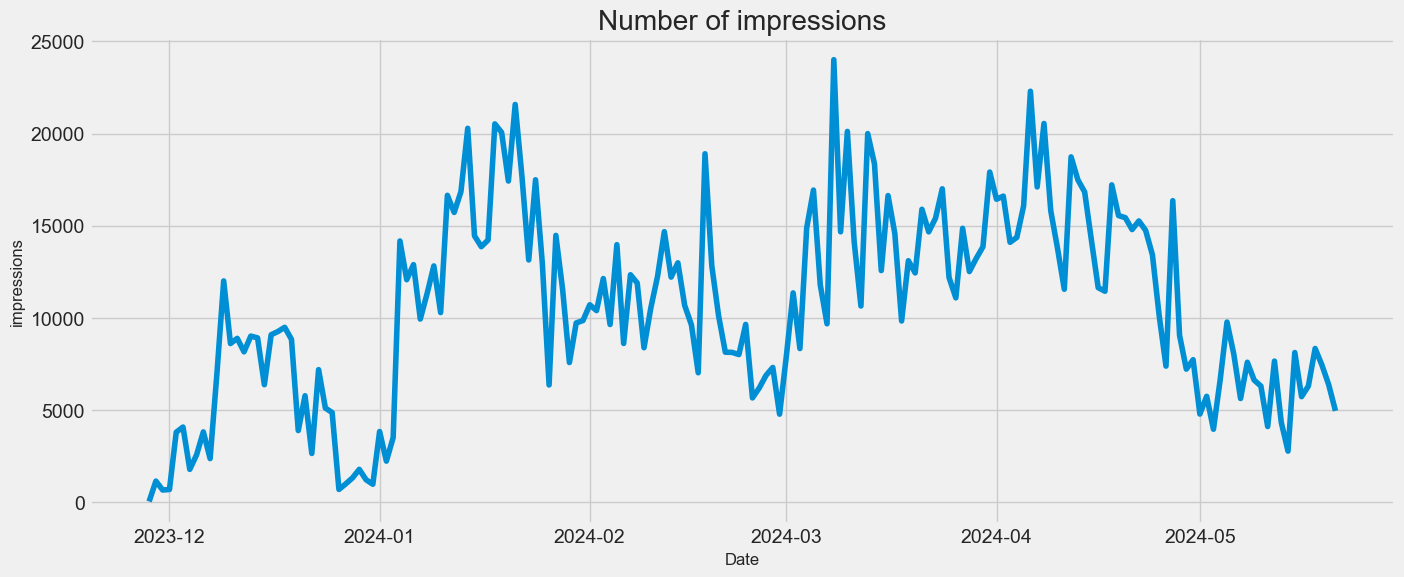

In [52]:
plt.figure(figsize = (15, 6))
plt.plot(tr_df.index, tr_df['impressions'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('impressions', {'fontsize': 12})
plt.title('Number of impressions')
plt.show()

In [53]:
n_cols = 1
impressionsdataset = tr_df['impressions']
impressionsdataset = pd.DataFrame(impressionsdataset)
impressionsdata = impressionsdataset.values

impressionsdata.shape

(176, 1)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
impressions_scaled_data = scaler.fit_transform(np.array(impressionsdata))

In [55]:
train_size = int(len(impressionsdata) * 0.80)
test_size = len(impressionsdata) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 140 Test Size : 36


In [56]:
train_data = impressions_scaled_data[0:train_size, :]
train_data.shape

(140, 1)

In [57]:
# Creating a Training set with 60 time-steps and 1 target
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.        ],
       [0.04612562],
       [0.02594045],
       [0.02714989],
       [0.1567687 ],
       [0.16848778],
       [0.07269163],
       [0.10555509],
       [0.1575611 ],
       [0.097089  ],
       [0.28897323],
       [0.4991659 ],
       [0.35749437],
       [0.36925515],
       [0.33872717],
       [0.37434315],
       [0.37029777],
       [0.26432563],
       [0.37738761],
       [0.38472767],
       [0.39423638],
       [0.36696138],
       [0.16052215],
       [0.2393861 ],
       [0.10868296],
       [0.29848194],
       [0.21156894],
       [0.20130953],
       [0.027275  ],
       [0.03982818],
       [0.05342397],
       [0.07273334],
       [0.04925348],
       [0.03903578],
       [0.1583952 ],
       [0.09137543],
       [0.14467428],
       [0.58970723],
       [0.50200184],
       [0.53611644],
       [0.41292018],
       [0.4702227 ],
       [0.5331971 ],
       [0.4275586 ],
       [0.69301026],
       [0.65426641],
       [0.70130953],
  

In [58]:
len(x_train)

80

In [59]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [60]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [61]:
x_train.shape , y_train.shape

((80, 60, 1), (80, 1))

In [62]:
model = Sequential([
    LSTM(100, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(100, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics=['mean_absolute_error'])

C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,977 (488.19 KB)

 Trainable params: 124,977 (488.19 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 300, batch_size= 32 , callbacks= callbacks )

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.1920 - mean_absolute_error: 0.3933
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0518 - mean_absolute_error: 0.1927
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0256 - mean_absolute_error: 0.1308
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0418 - mean_absolute_error: 0.1549
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0357 - mean_absolute_error: 0.1403
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0237 - mean_absolute_error: 0.1259
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0276 - mean_absolute_error: 0.1338
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0240 - mean_absolute_error: 0.1252
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0236 - mean_absolute_error: 0.1213
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0206 - mean_absolute_error: 0.1140
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/ste

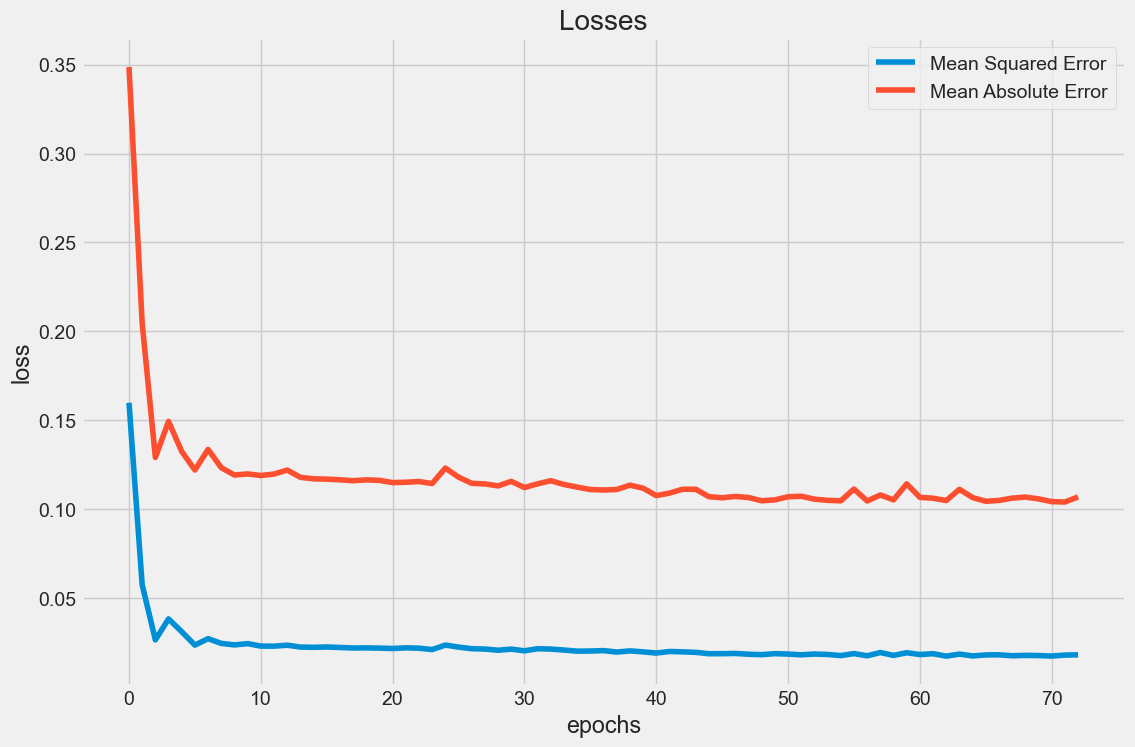

In [65]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [66]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = impressions_scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [67]:
x_test.shape , y_test.shape

((36, 60, 1), (36, 1))

In [68]:
predictions = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


In [69]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(36, 1)

In [70]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

2590.64

In [71]:
preds_acts = pd.DataFrame(data={'Predicted impressions':predictions.flatten(), 'Actual impressions':y_test.flatten()})
preds_acts

,Predicted impressions,Actual impressions
0,15232.090820,11636.0
1,14661.173828,11443.0
2,13941.140625,17217.0
3,13935.159180,15549.0
4,14165.326172,15435.0
5,14513.786133,14792.0
6,14817.188477,15258.0
7,15112.473633,14744.0
8,15299.263672,13416.0
9,15236.212891,10105.0


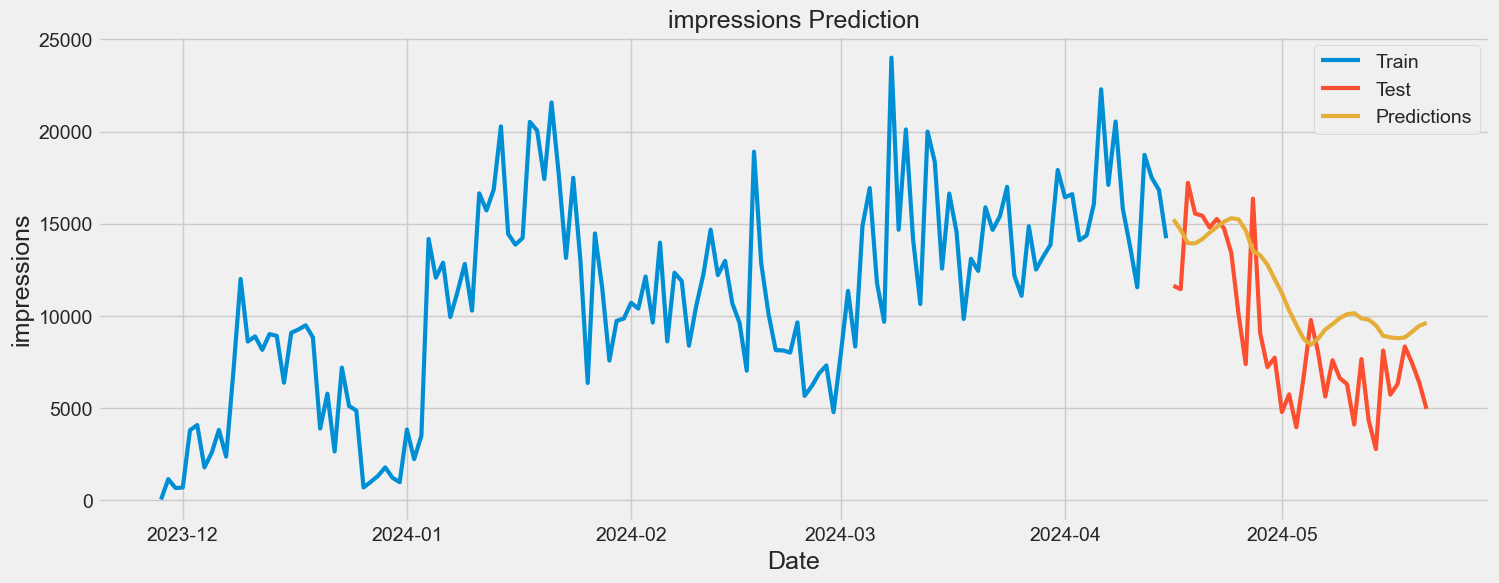

In [72]:
train = impressionsdataset.iloc[:train_size , 0:1]
test = impressionsdataset.iloc[train_size: , 0:1]
test['Predicted impressions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('impressions Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('impressions', fontsize= 18)
plt.plot(train['impressions'], linewidth= 3)
plt.plot(test['impressions'], linewidth= 3)
plt.plot(test["Predicted impressions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

## Forecast Next 30 Days

In [73]:
from datetime import timedelta

In [74]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [75]:
future = 30*2
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(impressionsdataset.index[-1]) + timedelta(days=i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.3999]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[0.3999, 0.4163427]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.3999, 0.4163427, 0.437692]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.3999, 0.4163427, 0.437692, 0.46107858]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.3999, 0.4163427, 0.437692, 0.46107858, 0.4845454]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.3999, 0.4163427, 0.437692, 0.46107858, 0.4845454, 0.5067888]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.3999, 0.4163427, 0.437692, 0.46107858, 0.4845454, 0.5067888, 0.52696633]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.3999, 0.4163427, 0.437692, 0.46107858, 0.4845454, 0.5067888, 0.52696633, 0.54456484]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.3999, 0.4163427, 0.437692, 0.46107858, 0.4845454, 0.5067888, 0.52696633, 0.54456484, 0.55931807]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0.3999, 0.4163427, 0.437692, 0.46107858, 0.4845454, 0.5067888, 0.52696633, 0.54456484, 0.55931807, 0.5711492]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [76]:
time

[Timestamp('2024-05-21 00:00:00'),
 Timestamp('2024-05-22 00:00:00'),
 Timestamp('2024-05-23 00:00:00'),
 Timestamp('2024-05-24 00:00:00'),
 Timestamp('2024-05-25 00:00:00'),
 Timestamp('2024-05-26 00:00:00'),
 Timestamp('2024-05-27 00:00:00'),
 Timestamp('2024-05-28 00:00:00'),
 Timestamp('2024-05-29 00:00:00'),
 Timestamp('2024-05-30 00:00:00'),
 Timestamp('2024-05-31 00:00:00'),
 Timestamp('2024-06-01 00:00:00'),
 Timestamp('2024-06-02 00:00:00'),
 Timestamp('2024-06-03 00:00:00'),
 Timestamp('2024-06-04 00:00:00'),
 Timestamp('2024-06-05 00:00:00'),
 Timestamp('2024-06-06 00:00:00'),
 Timestamp('2024-06-07 00:00:00'),
 Timestamp('2024-06-08 00:00:00'),
 Timestamp('2024-06-09 00:00:00'),
 Timestamp('2024-06-10 00:00:00'),
 Timestamp('2024-06-11 00:00:00'),
 Timestamp('2024-06-12 00:00:00'),
 Timestamp('2024-06-13 00:00:00'),
 Timestamp('2024-06-14 00:00:00'),
 Timestamp('2024-06-15 00:00:00'),
 Timestamp('2024-06-16 00:00:00'),
 Timestamp('2024-06-17 00:00:00'),
 Timestamp('2024-06-

In [77]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output)

In [78]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

In [79]:
df_result

,Date,Forecasted
0,2024-05-21,9621.801758
1,2024-05-22,10016.065430
2,2024-05-23,10527.978516
3,2024-05-24,11088.742188
4,2024-05-25,11651.429688
5,2024-05-26,12184.782227
6,2024-05-27,12668.598633
7,2024-05-28,13090.576172
8,2024-05-29,13444.329102
9,2024-05-30,13728.014648


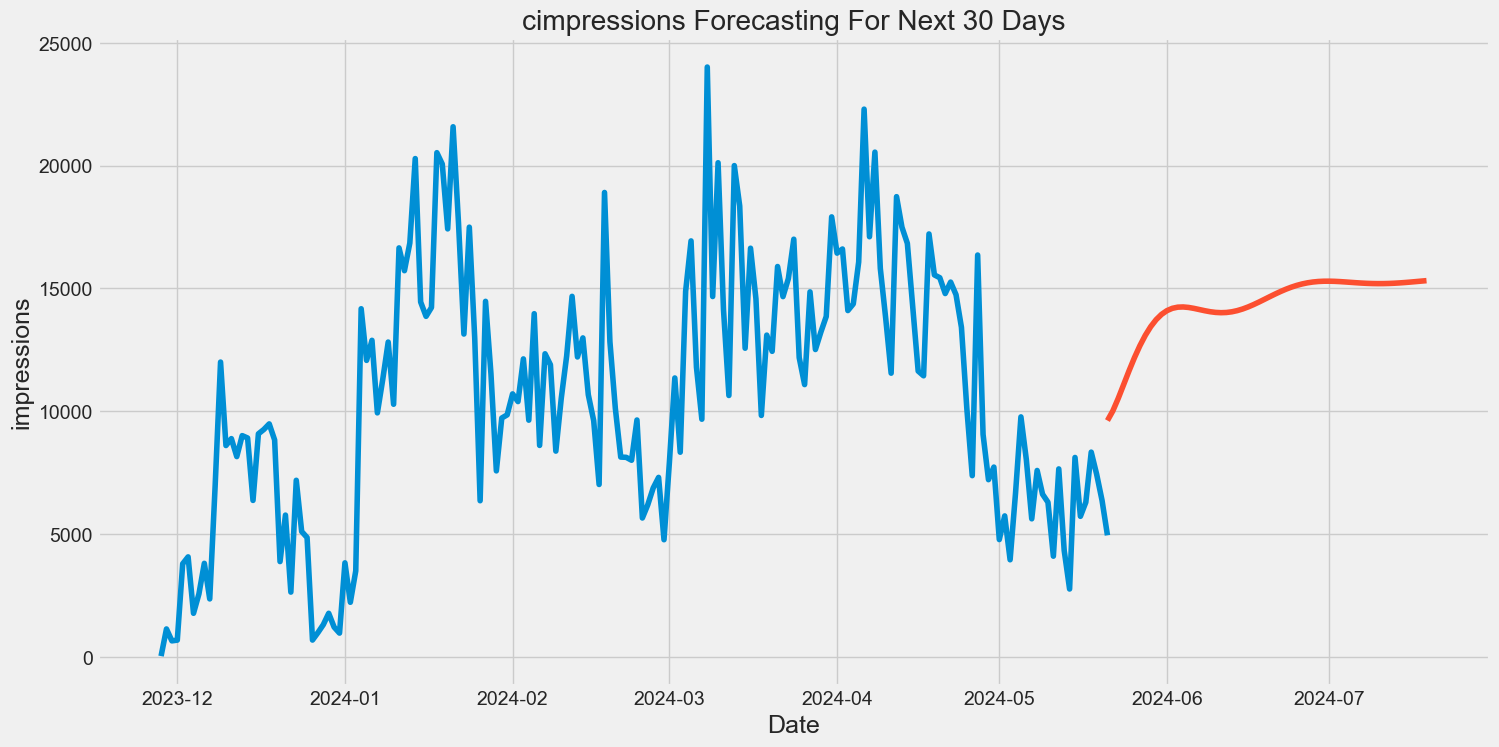

In [80]:
plt.figure(figsize=(16,8))
plt.title('impressions Forecasting For Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('impressions' ,fontsize=18)
plt.plot(impressionsdataset['impressions'])
plt.plot(df_result.set_index('Date')[['Forecasted']])